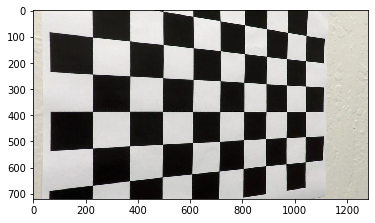

In [108]:
import os, glob
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


def camera_calibration(images, nx,ny):

    objpoints = [] 
    imgpoints = [] 
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    images_with_corners = []
    
    for image in images:
    
	    img = mpimg.imread(image)
	    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
	    
	    if ret == True:
	        imgpoints.append(corners)
	        objpoints.append(objp)
	        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
	        images_with_corners.append(img)                 
    return objpoints, imgpoints, images_with_corners

def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

objpoints, imgpoints, images = camera_calibration(glob.glob('*jpg'), 9, 6)

plt.imshow(cal_undistort(mpimg.imread(glob.glob('*jpg')[15]), objpoints, imgpoints))


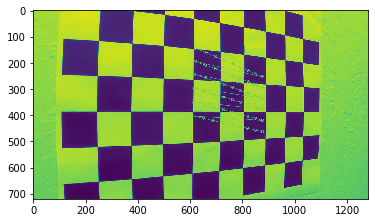

In [99]:
#objpoints
#imgpoints
plt.imshow(images[15])

In [102]:
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image

# 9 x 6
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

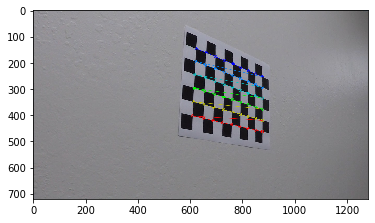

In [103]:
for file in glob.glob('*jpg'):
    
    img = mpimg.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
    

In [84]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

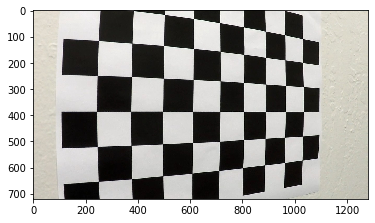

In [70]:
plt.imshow(mpimg.imread(glob.glob('*jpg')[15]))

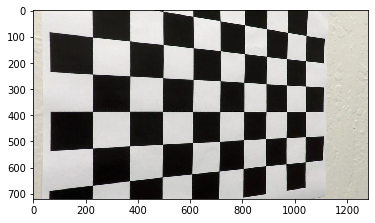

In [104]:
plt.imshow(cal_undistort(mpimg.imread(glob.glob('*jpg')[15]), objpoints, imgpoints))